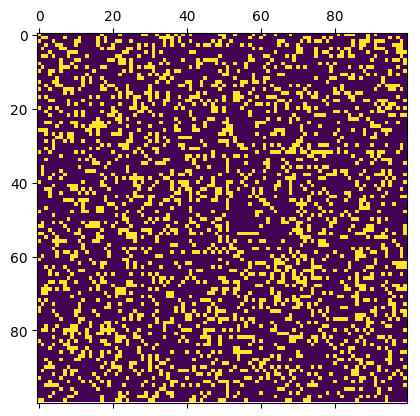

In [3]:
################################################################################
# conway.py
#
# Author: electronut.in
#
# Description:
#
# A simple Python/matplotlib implementation of Conway's Game of Life.
###############################################################################
using PyCall
using PyPlot

#@pyimport matplotlib.pyplot as plt
@pyimport matplotlib.animation as animation




#%matplotlib inline
#pygui(true)
#pygui(:gtk)
#pygui(false)
#matplotlib.use['nbagg']

#matplotlib.use('nbagg')

N = 100
ON = 255
OFF = 0
vals = [ON, OFF]

function foo()
    if rand(1:2) == 1
        return ON
    else
        return OFF
    end
end

# populate grid with random on/off - more off than on
grid = fill(ON, (N, N))
for i in 1:N
    for j in 1:N
        grid[i, j]=foo()
    end
end



function update(data)

  global grid
  # copy grid since we require 8 neighbors for calculation
  # and we go line by line
  newGrid = copy(grid)
  for i in 1:N
    for j in 1:N
      # compute 8-neghbor sum
      # using toroidal boundary conditions - x and y wrap around
      # so that the simulaton takes place on a toroidal surface.
    #  total = (grid[i, (j-1)%N] + grid[i, (j+1)%N] +
    #           grid[(i-1)%N, j] + grid[(i+1)%N, j] +
    #           grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
    #           grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255
      total = rand(1:6)
      # apply Conway's rules
      if grid[i, j]  == ON
        if (total < 2) || (total > 3)
          newGrid[i, j] = OFF
        end
      else
        if total == 3
          newGrid[i, j] = ON
        end
      end
    end
  end
  # update data
  mat[:set_data](newGrid)
  grid = newGrid
  return [mat]
end

# set up animation
fig, ax = PyPlot.subplots()
mat = ax[:matshow](grid)
ani = animation.FuncAnimation(fig, update, interval=50,
                              save_count=50)
PyPlot.show()

